In [343]:
# import the dataset from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
df = pd.read_csv('1-27PM.csv',encoding='utf-8')

In [345]:
df.head()

,title,full_name
0,Improved Salient Object Extraction using Struc...,Sharad Kumar Ghimire
1,Performance Analysis of LTE-Advanced Mobile Re...,Sharad Kumar Ghimire
2,Analysis and Optimization of Magnetic Resonant...,Sharad Kumar Ghimire
3,Comparative Analysis of Cell Balancing Topolog...,Sharad Kumar Ghimire
4,GAN-Based Two-Step Pipeline for Real-World Ima...,Sharad Kumar Ghimire


In [346]:
#preprocessing

In [347]:
df = df.drop('full_name', axis=1)

In [348]:
df.head()

,title
0,Improved Salient Object Extraction using Struc...
1,Performance Analysis of LTE-Advanced Mobile Re...
2,Analysis and Optimization of Magnetic Resonant...
3,Comparative Analysis of Cell Balancing Topolog...
4,GAN-Based Two-Step Pipeline for Real-World Ima...


In [349]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [350]:
df['cleaned'] = df['title'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [351]:
df.head()

,title,cleaned
0,Improved Salient Object Extraction using Struc...,improved salient object extraction using struc...
1,Performance Analysis of LTE-Advanced Mobile Re...,performance analysis lte advanced mobile relay...
2,Analysis and Optimization of Magnetic Resonant...,analysis optimization magnetic resonant wirele...
3,Comparative Analysis of Cell Balancing Topolog...,comparative analysis cell balancing topologies...
4,GAN-Based Two-Step Pipeline for Real-World Ima...,gan based two step pipeline real world image s...


In [352]:
#tf-idf vectorization

In [353]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [354]:
X.toarray() #vector representation of the sparse matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53659682, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.42668254,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [355]:
# implementation of KMeans

In [356]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

C:\Users\suyog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [357]:
X.shape

(787, 280)

In [358]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [359]:
#x0

In [360]:
#x1

In [361]:
x0.shape

(787,)

In [362]:
x1.shape

(787,)

In [363]:
# one point (x0, x1) for each text. This enables us to create a scatter chart.

In [364]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [365]:
df.head()

,title,cleaned,cluster,x0,x1
0,Improved Salient Object Extraction using Struc...,improved salient object extraction using struc...,2,-0.067549,-0.122619
1,Performance Analysis of LTE-Advanced Mobile Re...,performance analysis lte advanced mobile relay...,2,-0.062384,-0.037231
2,Analysis and Optimization of Magnetic Resonant...,analysis optimization magnetic resonant wirele...,2,-0.070203,-0.067255
3,Comparative Analysis of Cell Balancing Topolog...,comparative analysis cell balancing topologies...,2,-0.052966,-0.014516
4,GAN-Based Two-Step Pipeline for Real-World Ima...,gan based two step pipeline real world image s...,2,-0.078711,-0.131647


In [366]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
sodip,legacy,towards,service,provider,defined,software,migration,ipv,network

Cluster 1
extraction,exchange,examination,feature,word,news,ioe,issue,vol,bulletin

Cluster 2
neural,networks,performance,network,detection,analysis,system,nepal,based,using


In [367]:
# map clusters to appropriate labels 
cluster_map = {
                0: "network and security",
                1:"ioe news bulletin",
                2: "neural network",
              }
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

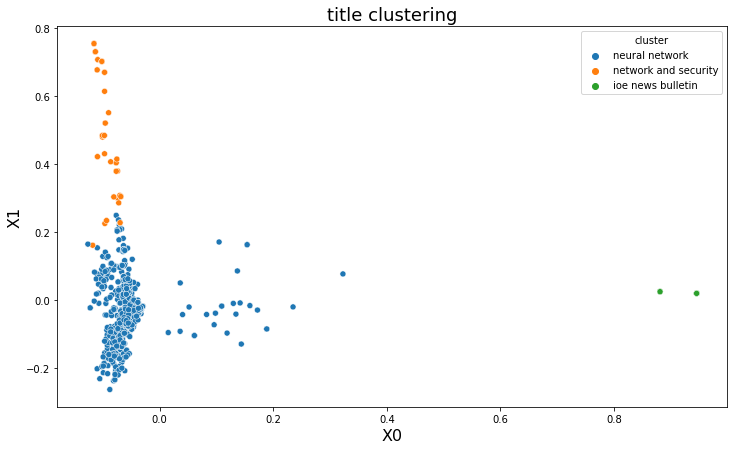

In [368]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("title clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster')
plt.show()